# US Airlines--Which is the Most Punctual?

**Authors:** Chakshu Madhok, Wynonna Rinkacs, Ziqi Yao

**Date:** May 12, 2017

This Jupyter Notebook was created for the NYU Stern course Data Bootcamp. 

## Abstract

In this project, we aim to determine the “most punctual” commercial airline for domestic flights, based on 2015 flight data from the U.S. DOT. 

**Motivation:** As the old saying goes, time is money. Most people prefer to save as much time as possible and to avoid delays when traveling. However, the everyday consumer has no control over avoiding a flight delay--unless he or she strategically chooses flights that are unlikely to be delayed in the first place. 
Although some people may be loyal to a certain airline for the quality of amenities offered, we believe that punctuality is the leading factor in determining a “good” airline. Through our analysis, we will reveal which airline one should pick to minimize the chance of a delayed flight.


## Preliminaries 

Import packages for later use.

In [1]:
import sys                             # system module 
import pandas as pd                    # data package
import matplotlib.pyplot as plt        # graphics module  
import datetime as dt                  # date and time module
import numpy as np      
import seaborn as sns

%matplotlib inline
sns.set_style('whitegrid')
sns.color_palette("pastel")
                  
# check versions, make sure Python is running
print('Python version:', sys.version)
print('Pandas version: ', pd.__version__)
print('Today: ', dt.date.today())

Python version: 3.5.2 |Anaconda custom (64-bit)| (default, Jul  5 2016, 11:41:13) [MSC v.1900 64 bit (AMD64)]
Pandas version:  0.18.1
Today:  2017-05-12


## Loading the Data


**Data Source:** To access and use the data, it is easiest to [download the files](https://www.kaggle.com/usdot/flight-delays) directly to your computer and import it into Jupyter Notebook from the location on your computer. 

First, we access the 3 data files from the local file paths and save them to DataFrames:
- airports.csv - airport codes, names, and locations
- airlines.csv - airline codes and names
- flights.csv - commercial domestic flights in 2015, flight info

[df].head() helps us see the data and variables we are dealing with in each file. 

In [2]:
path = 'C:/Users/Ziqi/Desktop/Data Bootcamp/Project/airports.csv'
airports = pd.read_csv(path)
airports.head()     

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [3]:
airlines = pd.read_csv('C:/Users/Ziqi/Desktop/Data Bootcamp/Project/airlines.csv')
airlines.head()

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways


In [4]:
flights = pd.read_csv('C:/Users/Ziqi/Desktop/Data Bootcamp/Project/flights.csv', low_memory=False)    # (this is a big data file)
flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# number of rows and columns of each DataFrame

print('airports:',airports.shape)
print('airlines:',airlines.shape)
print('flights:',flights.shape)

airports: (322, 7)
airlines: (14, 2)
flights: (5819079, 31)


We see that the data contain 322 airports, 14 airlines, and 5,819,079 flights.

## First Glance: Average Arrival Delay

The main DataFrame of interest is **flights**, which contains information about  airlines, airports, and delays. Here, we examine the columns in **flights** and create a new DataFrame with our columns of interest.

In [6]:
# list of column names and datatypes in flights

flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
YEAR                   int64
MONTH                  int64
DAY                    int64
DAY_OF_WEEK            int64
AIRLINE                object
FLIGHT_NUMBER          int64
TAIL_NUMBER            object
ORIGIN_AIRPORT         object
DESTINATION_AIRPORT    object
SCHEDULED_DEPARTURE    int64
DEPARTURE_TIME         float64
DEPARTURE_DELAY        float64
TAXI_OUT               float64
WHEELS_OFF             float64
SCHEDULED_TIME         float64
ELAPSED_TIME           float64
AIR_TIME               float64
DISTANCE               int64
WHEELS_ON              float64
TAXI_IN                float64
SCHEDULED_ARRIVAL      int64
ARRIVAL_TIME           float64
ARRIVAL_DELAY          float64
DIVERTED               int64
CANCELLED              int64
CANCELLATION_REASON    object
AIR_SYSTEM_DELAY       float64
SECURITY_DELAY         float64
AIRLINE_DELAY          float64
LATE_AIRCRAFT

In [7]:
flights.index

RangeIndex(start=0, stop=5819079, step=1)

### Cleaning and Shaping

In [8]:
# create new DataFrame with relevant variables

columns=['YEAR',
 'MONTH',
 'DAY',
 'DAY_OF_WEEK',
 'AIRLINE',
 'FLIGHT_NUMBER', 
 'ORIGIN_AIRPORT',
 'DESTINATION_AIRPORT',
 'DEPARTURE_DELAY',
 'ARRIVAL_DELAY',
 'DIVERTED',
 'CANCELLED',
 'AIR_SYSTEM_DELAY',
 'SECURITY_DELAY',
 'AIRLINE_DELAY',
 'LATE_AIRCRAFT_DELAY',
 'WEATHER_DELAY']

flights2 = pd.DataFrame(flights, columns=columns)
flights2.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_DELAY,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,ANC,SEA,-11.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,LAX,PBI,-8.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,SFO,CLT,-2.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,LAX,MIA,-5.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,SEA,ANC,-1.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN


In [9]:
# for later convenience, we will replace the airline codes with each airline's full name, using a dictionary 

airlines_dictionary = dict(zip(airlines['IATA_CODE'], airlines['AIRLINE']))
flights2['AIRLINE'] = flights2['AIRLINE'].apply(lambda x: airlines_dictionary[x])
flights2.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_DELAY,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,Alaska Airlines Inc.,98,ANC,SEA,-11.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,American Airlines Inc.,2336,LAX,PBI,-8.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US Airways Inc.,840,SFO,CLT,-2.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,American Airlines Inc.,258,LAX,MIA,-5.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,Alaska Airlines Inc.,135,SEA,ANC,-1.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN


The DataFrame **flights2** will serve as the foundation for our analysis on US domestic flight delays in 2015. We can further examine the data to determine which airline is the "most punctual".

First, we will rank the airlines by average arrival delay. We are mainly concerned about arrival delay because regardless of whether a flight departs on time, what matters most to the passenger is whether he or she arrives at the final destination on time. Of course, a significant departure delay may result in an arrival delay. However, airlines may include a buffer in the scheduled arrival time to ensure that passengers reach their destination at the promised time.

In [12]:
# create DataFrame with airlines and arrival delays

delays = flights2[['AIRLINE','DEPARTURE_DELAY','ARRIVAL_DELAY']]

# if we hadn't used a dictionary to change the airline names, this is the code we would have used to produce the same result:
#flights4 = pd.merge(airlines, flights3, left_on='IATA_CODE', right_on='AIRLINE', how='left')
#flights4.drop('IATA_CODE', axis=1, inplace=True)
#flights4.drop('AIRLINE_y', axis=1, inplace=True)
#flights4.rename(columns={'AIRLINE_x': 'AIRLINE'}, inplace=True)

delays.head()

,AIRLINE,DEPARTURE_DELAY,ARRIVAL_DELAY
0,Alaska Airlines Inc.,-11.0,-22.0
1,American Airlines Inc.,-8.0,-9.0
2,US Airways Inc.,-2.0,5.0
3,American Airlines Inc.,-5.0,-9.0
4,Alaska Airlines Inc.,-1.0,-21.0


In [13]:
# group data by airline name, calculate average arrival delay for each airline in 2015

airline_av_delay = delays.groupby(['AIRLINE']).mean()
airline_av_delay

,DEPARTURE_DELAY,ARRIVAL_DELAY
AIRLINE,,
Alaska Airlines Inc.,1.785801,-0.976563
American Airlines Inc.,8.900856,3.451372
American Eagle Airlines Inc.,10.125188,6.457873
Atlantic Southeast Airlines,8.715934,6.585379
Delta Air Lines Inc.,7.369254,0.186754
Frontier Airlines Inc.,13.350858,12.504706
Hawaiian Airlines Inc.,0.485713,2.023093
JetBlue Airways,11.514353,6.677861
Skywest Airlines Inc.,7.801104,5.845652


C:\Users\Ziqi\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


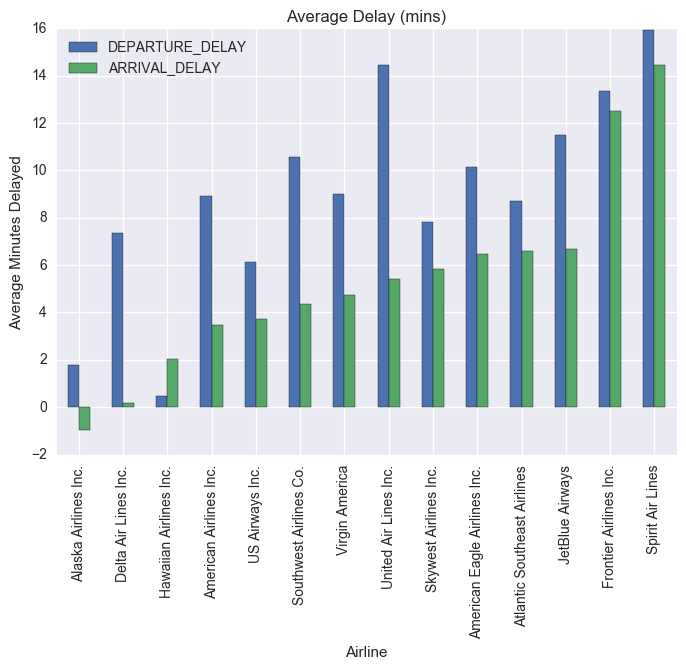

In [153]:
# create bar graph of average delay time for each airline

airline_av_delay.sort(['ARRIVAL_DELAY'], ascending=1, inplace=True)


sns.set()
fig, ax = plt.subplots()

airline_av_delay.plot(ax=ax,
       kind='bar',
       title='Average Delay (mins)')

ax.set_ylabel('Average Minutes Delayed')
ax.set_xlabel('Airline')

plt.show()



The bar graph shows that Alaska Airlines has the shortest delay on average--in fact, the average Alaska Airlines flight arrives before the scheduled arrival time, making it the airline with the best time on record. On the other end, Spirit Airlines has the longest average arrival delay. Interestingly, none of the average arrival delays exceed 15 minutes--for the most part, it seems that US domestic flights have been pretty punctual in 2015!

Additionally, almost all of the airlines have a departure delay greater than the arrival delay (with the exception of Hawaiian Airlines), which makes sense, considering that departure delay could be due to a variety of factors related to the departure airport, such as security, late passengers, or late arrivals of other flights to that airport. Despite a greater average departure delay, most airports seem to make up for the delay during the travel time, resulting in a shorter average arrival delay. 

## Second Glance: Consistency

Now that we know how the airlines rank in terms of arrival delay, we can look at the how many of each airline's flights were cancelled or diverted. Second, we can calculate delay percentages for each airline, i.e. what percent of each airline's total flights were delayed in 2015, to determine which airlines are more likely to be delayed. 

In [71]:
# new DataFrame with relevant variables

diverted_cancelled = flights2[['AIRLINE','DIVERTED', 'CANCELLED']]
diverted_cancelled.head()

,AIRLINE,DIVERTED,CANCELLED
0,Alaska Airlines Inc.,0,0
1,American Airlines Inc.,0,0
2,US Airways Inc.,0,0
3,American Airlines Inc.,0,0
4,Alaska Airlines Inc.,0,0


In [73]:
diverted_cancelled = diverted_cancelled.groupby(['AIRLINE']).sum()

In [52]:
# total number of flights scheduled by each airline in 2015

total_flights = flights2[['AIRLINE', 'FLIGHT_NUMBER']].groupby(['AIRLINE']).count()
total_flights.rename(columns={'FLIGHT_NUMBER': 'TOTAL_FLIGHTS'}, inplace=True)
total_flights

,TOTAL_FLIGHTS
AIRLINE,
Alaska Airlines Inc.,172521
American Airlines Inc.,725984
American Eagle Airlines Inc.,294632
Atlantic Southeast Airlines,571977
Delta Air Lines Inc.,875881
Frontier Airlines Inc.,90836
Hawaiian Airlines Inc.,76272
JetBlue Airways,267048
Skywest Airlines Inc.,588353


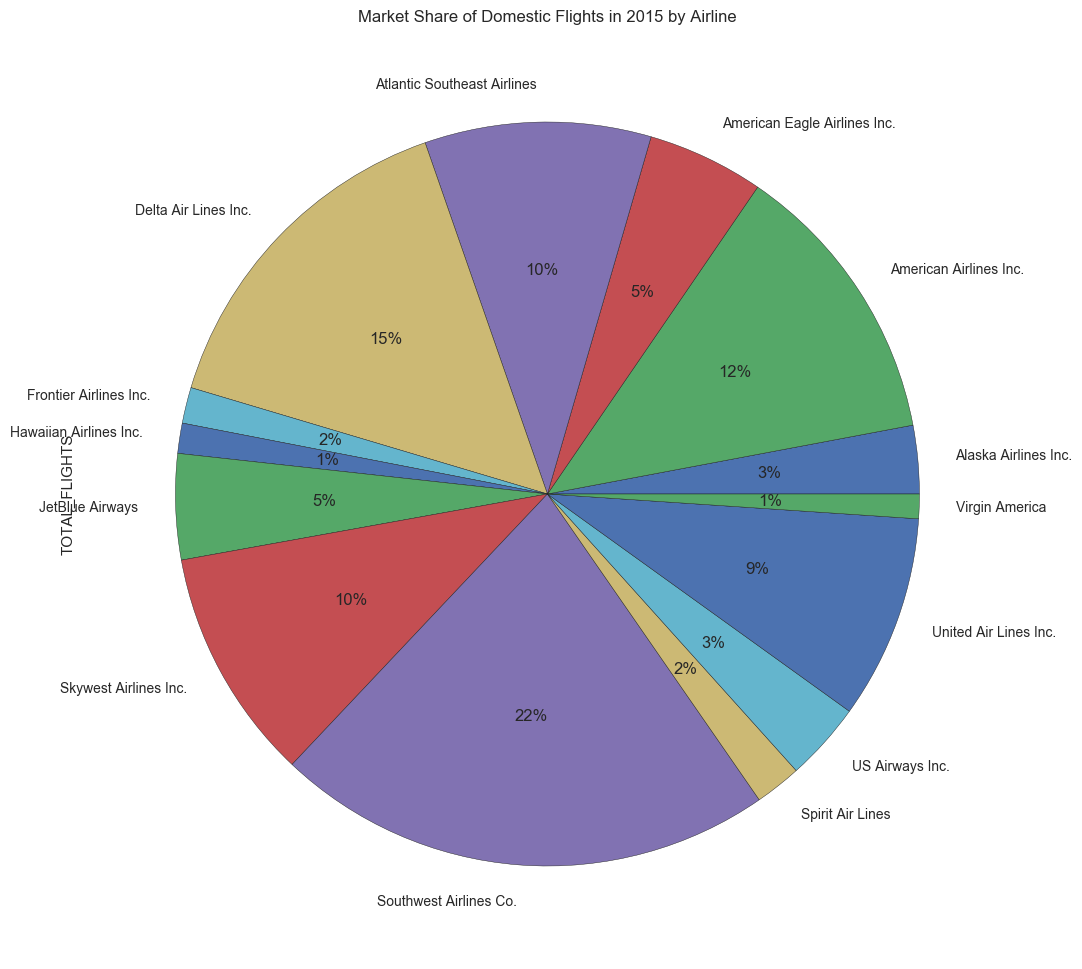

In [154]:
# Tangent: for fun, we can see which airlines were dominant in the number of domestic flights

total_flights['TOTAL_FLIGHTS'].plot.pie(figsize=(12,12), rot=45, autopct='%1.0f%%', title='Market Share of Domestic Flights in 2015 by Airline')

It appears that the airlines with the top three largest market share of domestic flights in 2015 were Southwest (22%), Delta (15%), and American Airlines (12%). 

In [74]:
#resetting the index to merge the two DataFrames

total_flights2 = total_flights.reset_index()
diverted_cancelled2 = diverted_cancelled.reset_index()

In [81]:
# check

total_flights2
diverted_cancelled2

,AIRLINE,DIVERTED,CANCELLED
0,Alaska Airlines Inc.,413,669
1,American Airlines Inc.,2130,10919
2,American Eagle Airlines Inc.,816,15025
3,Atlantic Southeast Airlines,1994,15231
4,Delta Air Lines Inc.,1782,3824
5,Frontier Airlines Inc.,158,588
6,Hawaiian Airlines Inc.,60,171
7,JetBlue Airways,730,4276
8,Skywest Airlines Inc.,1579,9960
9,Southwest Airlines Co.,3409,16043


In [89]:
# calculate divertion and cancellation rates (percentages) for each airline

dc_rates = pd.merge(diverted_cancelled2, total_flights2, on='AIRLINE')
dc_rates['DIVERTION_RATE'] = dc_rates['DIVERTED']/dc_rates['TOTAL_FLIGHTS']
dc_rates['CANCELLATION_RATE'] = dc_rates['CANCELLED']/dc_rates['TOTAL_FLIGHTS']
dc_rates = dc_rates.set_index(['AIRLINE'])
dc_rates

,DIVERTED,CANCELLED,TOTAL_FLIGHTS,DIVERTION_RATE,CANCELLATION_RATE
AIRLINE,,,,,
Alaska Airlines Inc.,413,669,172521,0.002394,0.003878
American Airlines Inc.,2130,10919,725984,0.002934,0.015040
American Eagle Airlines Inc.,816,15025,294632,0.002770,0.050996
Atlantic Southeast Airlines,1994,15231,571977,0.003486,0.026629
Delta Air Lines Inc.,1782,3824,875881,0.002035,0.004366
Frontier Airlines Inc.,158,588,90836,0.001739,0.006473
Hawaiian Airlines Inc.,60,171,76272,0.000787,0.002242
JetBlue Airways,730,4276,267048,0.002734,0.016012
Skywest Airlines Inc.,1579,9960,588353,0.002684,0.016929


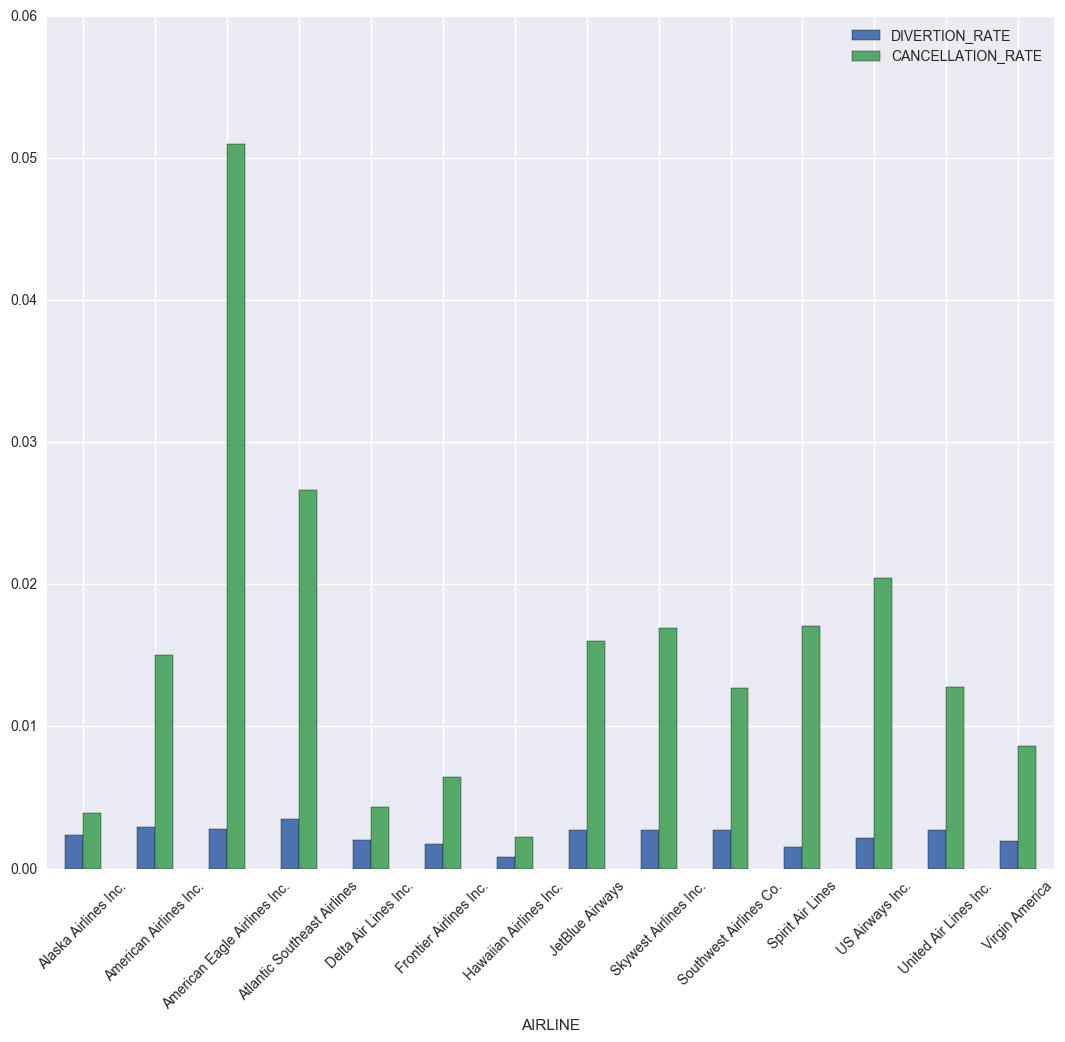

In [151]:
dc_rates[['DIVERTION_RATE','CANCELLATION_RATE']].plot.bar(legend=True, figsize=(13,11),rot=45)


Overall, the chance of cancellation or divertion is very low, with the divertion rate almost nonexistant. Flights are rarely diverted and only in extreme situations dues to plane safety failures, attacks, or natural disasters. We could use the flight divertion rate as a proxy for the safety of flying in 2015, and are happy to see this rate way below 0.01%. American Airlines and its partner American Eagle Airlines were the most likely to cancel a flight in 2015, while Hawaiian Airlines and Alaska Airlines were the least likely. (It is interesting to note that the two airlines operating out of the two states not in the continental U.S. are the least likely to be cancelled, despite have to travel the greatest distance.)

In [98]:
# create a DataFrame with all flights that had a positive arrival delay time

delayed = flights2['ARRIVAL_DELAY'] >= 0
pos_delay = flights2[delayed]
pos_delay.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_DELAY,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
2,2015,1,1,4,US Airways Inc.,840,SFO,CLT,-2.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN
5,2015,1,1,4,Delta Air Lines Inc.,806,SFO,MSP,-5.0,8.0,0,0,NaN,NaN,NaN,NaN,NaN
14,2015,1,1,4,Delta Air Lines Inc.,2440,SEA,MSP,-1.0,8.0,0,0,NaN,NaN,NaN,NaN,NaN
20,2015,1,1,4,Spirit Air Lines,520,LAS,MCI,25.0,6.0,0,0,NaN,NaN,NaN,NaN,NaN
21,2015,1,1,4,American Airlines Inc.,371,SEA,MIA,-8.0,1.0,0,0,NaN,NaN,NaN,NaN,NaN


In [99]:
# groupby function to determine how many flights had delayed arrival for each airline

pos_delay = pos_delay[['AIRLINE','ARRIVAL_DELAY']].groupby(['AIRLINE']).count()

In [100]:
pos_delay2 = pos_delay.reset_index()

In [133]:
# merge with total_flights to calculate percentage of flights that were delayed for each airline

delay_rates = pd.merge(pos_delay2, total_flights2, on='AIRLINE')
delay_rates['DELAY_RATE'] = delay_rates['ARRIVAL_DELAY']/delay_rates['TOTAL_FLIGHTS']
delay_rates = delay_rates.set_index(['AIRLINE'])
delay_rates.sort(['DELAY_RATE'], ascending=1, inplace=True)
delay_rates.reset_index()

C:\Users\Ziqi\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,AIRLINE,ARRIVAL_DELAY,TOTAL_FLIGHTS,DELAY_RATE
0,Delta Air Lines Inc.,268416,875881,0.306453
1,Alaska Airlines Inc.,61277,172521,0.355186
2,American Airlines Inc.,266280,725984,0.366785
3,American Eagle Airlines Inc.,108689,294632,0.368897
4,United Air Lines Inc.,195603,515723,0.379279
5,Atlantic Southeast Airlines,226451,571977,0.395909
6,Southwest Airlines Co.,500071,1261855,0.396298
7,JetBlue Airways,106872,267048,0.400198
8,Skywest Airlines Inc.,236847,588353,0.402559
9,US Airways Inc.,80824,198715,0.406733


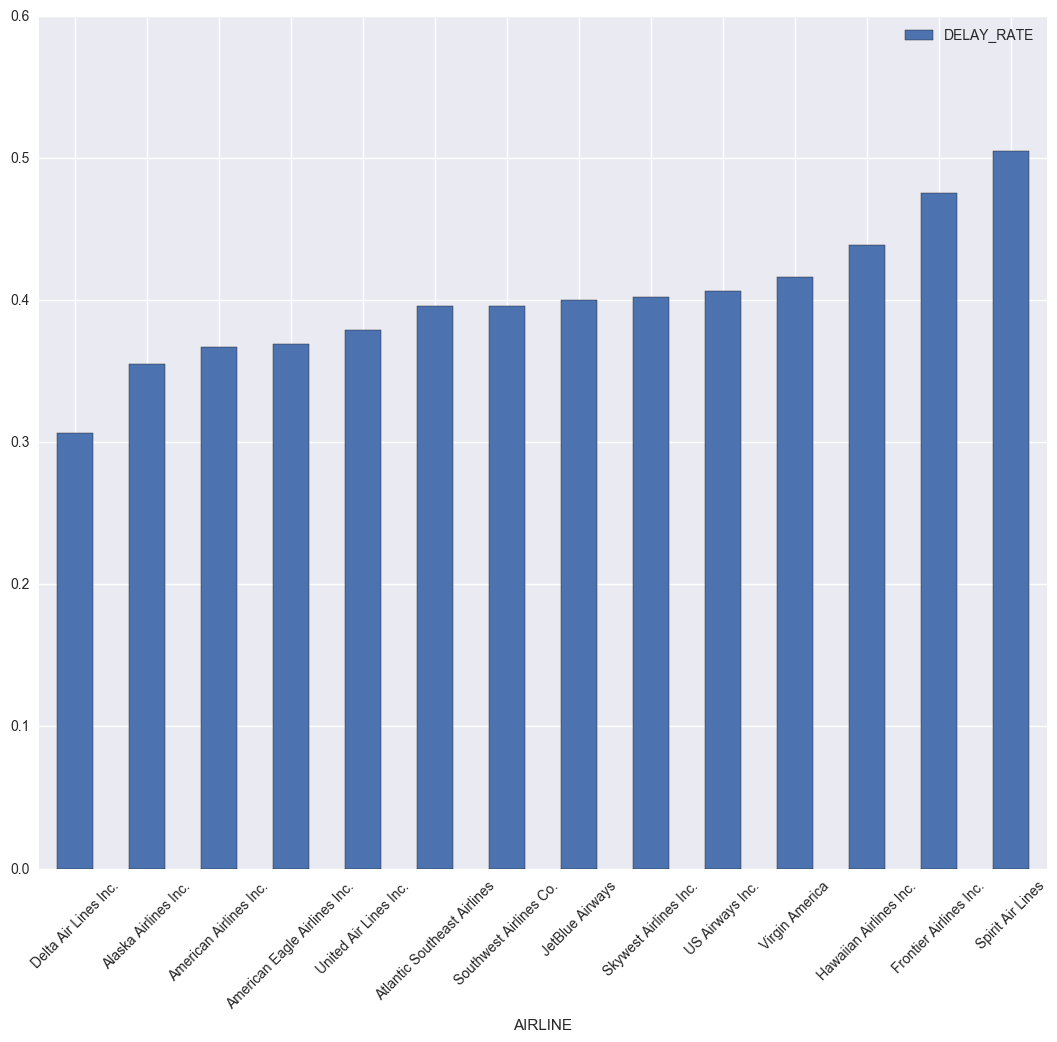

In [150]:
delay_rates[['DELAY_RATE']].plot.bar(legend=True, figsize=(13,11),rot=45)


Spirit Airlines has the largest chance of being delayed upon arrival, with Delta Airlines the least likely.

However, when we combine divertion rate, cancellation rate, and delay rate, we see that delays account for the majority of flights that didn't operate as scheduled for all airlines across the board.

In [117]:
# combining the two into one DataFrame

all_rates = pd.merge(dc_rates.reset_index(), delay_rates.reset_index()).set_index(['AIRLINE'])
all_rates

,DIVERTED,CANCELLED,TOTAL_FLIGHTS,DIVERTION_RATE,CANCELLATION_RATE,ARRIVAL_DELAY,DELAY_RATE
AIRLINE,,,,,,,
Alaska Airlines Inc.,413,669,172521,0.002394,0.003878,61277,0.355186
American Airlines Inc.,2130,10919,725984,0.002934,0.015040,266280,0.366785
American Eagle Airlines Inc.,816,15025,294632,0.002770,0.050996,108689,0.368897
Atlantic Southeast Airlines,1994,15231,571977,0.003486,0.026629,226451,0.395909
Delta Air Lines Inc.,1782,3824,875881,0.002035,0.004366,268416,0.306453
Frontier Airlines Inc.,158,588,90836,0.001739,0.006473,43217,0.475770
Hawaiian Airlines Inc.,60,171,76272,0.000787,0.002242,33496,0.439165
JetBlue Airways,730,4276,267048,0.002734,0.016012,106872,0.400198
Skywest Airlines Inc.,1579,9960,588353,0.002684,0.016929,236847,0.402559


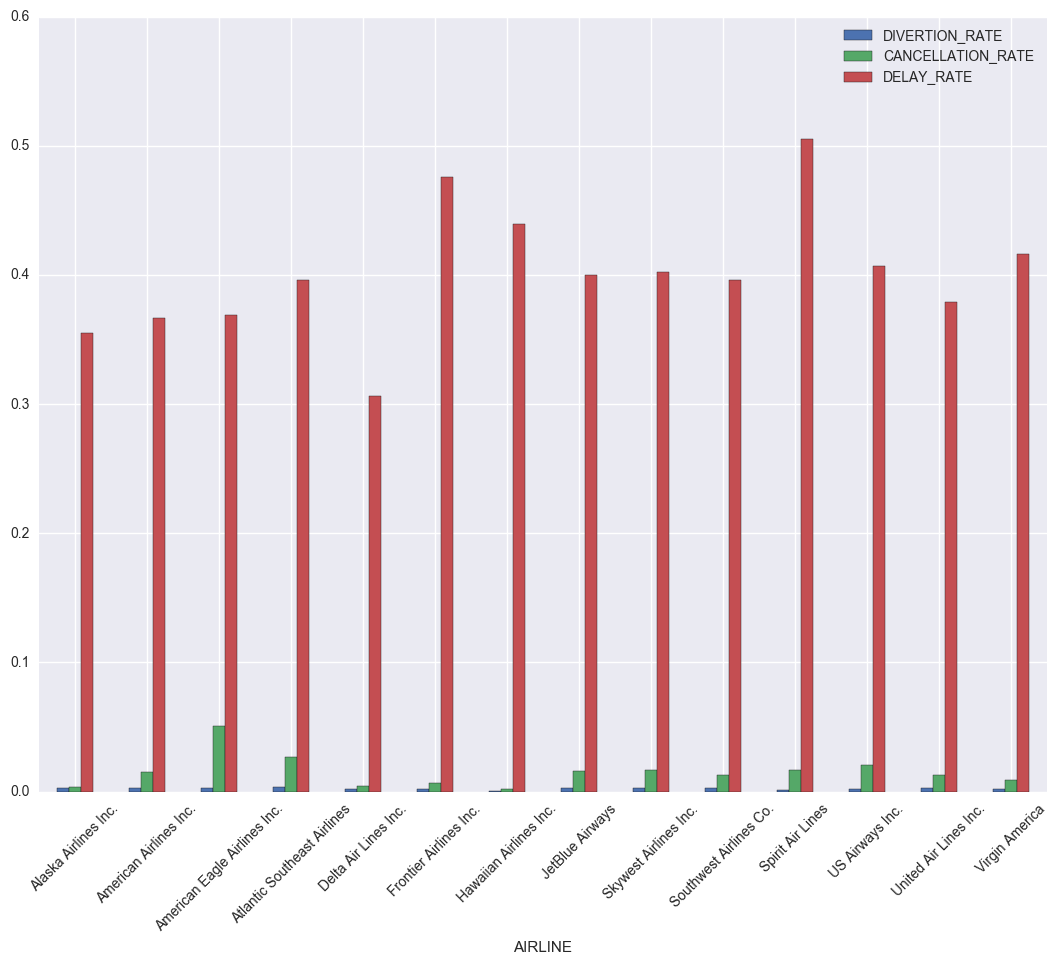

In [149]:
all_rates[['DIVERTION_RATE','CANCELLATION_RATE','DELAY_RATE']].plot.bar(legend=True, figsize=(13,10),rot=45)

## Conclusion

Obviously, delays are a lot more prevalent than diverted or cancelled flights. In conclusion, it appears that Delta Airlines was the most punctual domestic airline in 2015. Delta Airlines had the lowest average delay rate upon arrival and the third lowest cancellation rate. We can therefore state that if punctuality is a passenger's top priority when flights, we recommend flying Delta Airlines. The airlines with the highest average delay rate was Spirit Airlines, followed closely by Frontier. (While these flights are more likely to be delayed and arrive late, they are known as two of the cheapest airlines to fly in the U.S. While we are not observing ticket prices and affordability of airlines, it is still important to note.)